In [1]:
import pandas as pd
import numpy as np
import time                     #python 自带
from astropy.time import Time   #astropy 
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from moviepy.video.io.bindings import mplfig_to_npimage#动图生成
import moviepy.editor as mpy

In [2]:
orbitDataTAIJI  =  pd.read_csv('orbitDataTAIJI.dat', index_col = 0)  #读取csv文件
orbitData      =  orbitDataTAIJI.loc[0:366,:]

sunPX0 = orbitData['sunPX']
sunPY0 = orbitData['sunPY']
sunPZ0 = orbitData['sunPZ']

earthPX0 = orbitData['earthPX']
earthPY0 = orbitData['earthPY']
earthPZ0 = orbitData['earthPZ']

scp1X0 = orbitData['scp1X']
scp1Y0 = orbitData['scp1Y']
scp1Z0 = orbitData['scp1Z']

scp2X0 = orbitData['scp2X']
scp2Y0 = orbitData['scp2Y']
scp2Z0 = orbitData['scp2Z']

scp3X0 = orbitData['scp3X']
scp3Y0 = orbitData['scp3Y']
scp3Z0 = orbitData['scp3Z']

CE = SkyCoord(x=earthPX0, y=earthPY0, z=earthPZ0, unit='AU', representation_type='cartesian',  frame='icrs')
CS = SkyCoord(x=sunPX0, y=sunPY0, z=sunPZ0, unit='AU', representation_type='cartesian',  frame='icrs')
Csc1 = SkyCoord(x=scp1X0, y=scp1Y0, z=scp1Z0, unit='AU', representation_type='cartesian',  frame='icrs')
Csc2 = SkyCoord(x=scp2X0, y=scp2Y0, z=scp2Z0, unit='AU', representation_type='cartesian',  frame='icrs')
Csc3 = SkyCoord(x=scp3X0, y=scp3Y0, z=scp3Z0, unit='AU', representation_type='cartesian',  frame='icrs')


framename = 'barycentrictrueecliptic'
cEarth = CE.transform_to(framename)  # cEarth.gcrs does the same thing
cSun = CS.transform_to(framename)  
csc1 = Csc1.transform_to(framename)  
csc2 = Csc2.transform_to(framename)  
csc3 = Csc3.transform_to(framename) 

cEarth.representation_type = 'cartesian'
cSun.representation_type = 'cartesian'
csc1.representation_type = 'cartesian'
csc2.representation_type = 'cartesian'
csc3.representation_type = 'cartesian'

sunPX = cSun.x.value
sunPY = cSun.y.value
sunPZ = cSun.z.value

earthPX = cEarth.x.value
earthPY = cEarth.y.value
earthPZ = cEarth.z.value

scp1X = csc1.x.value
scp1Y = csc1.y.value
scp1Z = csc1.z.value

scp2X = csc2.x.value
scp2Y = csc2.y.value
scp2Z = csc2.z.value

scp3X = csc3.x.value
scp3Y = csc3.y.value
scp3Z = csc3.z.value

k = 15 #放大比例

scpX = (scp1X + scp2X + scp3X) / 3  
scpY = (scp1Y + scp2Y + scp3Y) / 3  
scpZ = (scp1Z + scp2Z + scp3Z) / 3  


scp1Xs = (1 + k) * scpX - k * scp1X
scp1Ys = (1 + k) * scpY - k * scp1Y
scp1Zs = (1 + k) * scpZ - k * scp1Z

scp2Xs = (1 + k) * scpX - k * scp2X
scp2Ys = (1 + k) * scpY - k * scp2Y
scp2Zs = (1 + k) * scpZ - k * scp2Z

scp3Xs = (1 + k) * scpX - k * scp3X
scp3Ys = (1 + k) * scpY - k * scp3Y
scp3Zs = (1 + k) * scpZ - k * scp3Z

In [3]:
orbitDataLISA  =  pd.read_csv('orbitDataLISA.dat',index_col = 0)  #读取csv文件
orbitData2      =  orbitDataLISA.loc[0:366,:]

scp1X20 = orbitData2['scp1X']
scp1Y20 = orbitData2['scp1Y']
scp1Z20 = orbitData2['scp1Z']

scp2X20 = orbitData2['scp2X']
scp2Y20 = orbitData2['scp2Y']
scp2Z20 = orbitData2['scp2Z']

scp3X20 = orbitData2['scp3X']
scp3Y20 = orbitData2['scp3Y']
scp3Z20 = orbitData2['scp3Z']

In [4]:
Csc12 = SkyCoord(x=scp1X20, y=scp1Y20, z=scp1Z20, unit='AU', representation_type='cartesian',  frame='icrs')
Csc22 = SkyCoord(x=scp2X20, y=scp2Y20, z=scp2Z20, unit='AU', representation_type='cartesian',  frame='icrs')
Csc32 = SkyCoord(x=scp3X20, y=scp3Y20, z=scp3Z20, unit='AU', representation_type='cartesian',  frame='icrs')


framename = 'barycentrictrueecliptic'

csc12 = Csc12.transform_to(framename)  
csc22 = Csc22.transform_to(framename)  
csc32 = Csc32.transform_to(framename) 

csc12.representation_type = 'cartesian'
csc22.representation_type = 'cartesian'
csc32.representation_type = 'cartesian'


scp1X2 = csc12.x.value
scp1Y2 = csc12.y.value
scp1Z2 = csc12.z.value

scp2X2 = csc22.x.value
scp2Y2 = csc22.y.value
scp2Z2 = csc22.z.value

scp3X2 = csc32.x.value
scp3Y2 = csc32.y.value
scp3Z2 = csc32.z.value

In [5]:
scpX2 = (scp1X2 + scp2X2 + scp3X2) / 3  
scpY2 = (scp1Y2 + scp2Y2 + scp3Y2) / 3  
scpZ2 = (scp1Z2 + scp2Z2 + scp3Z2) / 3  


scp1Xs2 = (1 + k) * scpX2 - k * scp1X2
scp1Ys2 = (1 + k) * scpY2 - k * scp1Y2
scp1Zs2 = (1 + k) * scpZ2 - k * scp1Z2

scp2Xs2 = (1 + k) * scpX2 - k * scp2X2
scp2Ys2 = (1 + k) * scpY2 - k * scp2Y2
scp2Zs2 = (1 + k) * scpZ2 - k * scp2Z2

scp3Xs2 = (1 + k) * scpX2 - k * scp3X2
scp3Ys2 = (1 + k) * scpY2 - k * scp3Y2
scp3Zs2 = (1 + k) * scpZ2 - k * scp3Z2

t:   0%|          | 3/750 [00:00<00:25, 29.85it/s, now=None]

MoviePy - Building file TAIJI&LISA.gif with imageio.


t:   1%|          | 5/750 [00:00<00:16, 46.02it/s, now=None]  

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


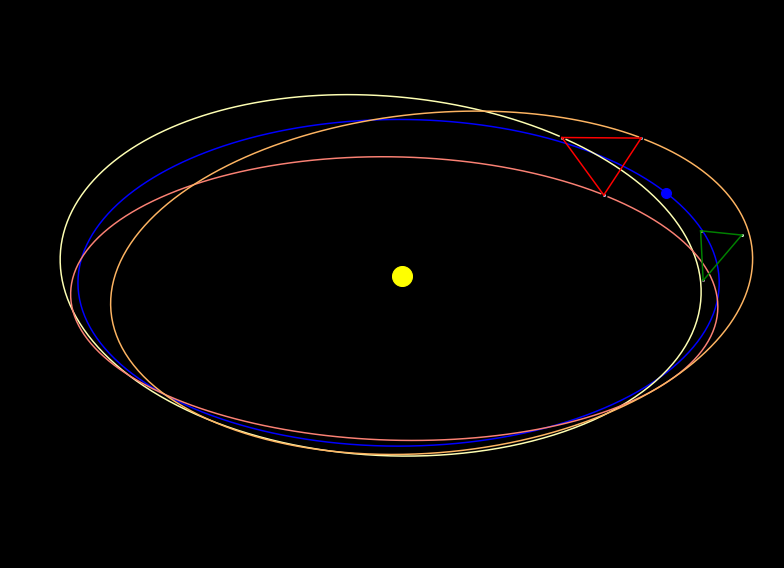

In [6]:
# #绘动图3d2#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
duration = 25 #总共的时间       figsize代表横纵比
speed = 1.0#播放速率    
number = len(orbitData)

plt.style.use('dark_background')
fig_mpl = plt.figure(figsize = (11,8))

ax = fig_mpl.add_subplot(111, projection='3d')



# 使用MOVIEPY让图动起来(根据时间t来更新图). 保存为GIF.
def make_frame_mpl(t):
    tNorm = t/duration      #0 --> 1
    index = int(number*(t/duration))  #0 --> number
    
    ax.clear()
    ax.view_init(45, 60)
    ax.set_zlabel('Z') #坐标轴
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    ax.set_xlim(-0.65,0.65)#设置刻度
    ax.set_ylim(-0.65,0.65)
    ax.set_zlim(-0.65,0.65)
    ax.set_axis_off()
    #sun
    ax.plot(sunPX[index:(index + 1)], sunPY[index:(index + 1)], sunPZ[index:(index + 1)],'o',ms=20, c ='yellow')
    ax.plot(sunPX[0:index], sunPY[0:index], sunPZ[0:index], ms=0.2, c ='yellow')
    
    #earth
    ax.plot(earthPX[index:(index + 1)], earthPY[index:(index + 1)], earthPZ[index:(index + 1)],'o',ms=10, c ='blue')
    ax.plot(earthPX[0:index], earthPY[0:index],earthPZ[0:index], ms=0.2, c ='blue')
    
    ####TAIJI####
    #scp1
    ax.plot(scp1Xs[index:(index + 1)], scp1Ys[index:(index + 1)], scp1Zs[index:(index + 1)],'o',ms=2)
    ax.plot(scp1Xs[0:index], scp1Ys[0:index], scp1Zs[0:index], ms=0.1)
    
    #scp2
    ax.plot(scp2Xs[index:(index + 1)], scp2Ys[index:(index + 1)], scp2Zs[index:(index + 1)],'o',ms=2)
    ax.plot(scp2Xs[0:index], scp2Ys[0:index], scp2Zs[0:index], ms=0.1)

    #scp3
    ax.plot(scp3Xs[index:(index + 1)], scp3Ys[index:(index + 1)], scp3Zs[index:(index + 1)],'o',ms=2)
    ax.plot(scp3Xs[0:index], scp3Ys[0:index], scp3Zs[0:index], ms=0.1)    

    
    #三角形形状
    ax.plot([scp1Xs[index], scp2Xs[index]], \
           [scp1Ys[index], scp2Ys[index]], \
            [scp1Zs[index], scp2Zs[index]], ms=2, c = 'red')

    ax.plot([scp3Xs[index], scp2Xs[index]], \
           [scp3Ys[index], scp2Ys[index]], \
            [scp3Zs[index], scp2Zs[index]], ms=2, c = 'red')

    ax.plot([scp1Xs[index], scp3Xs[index]], \
           [scp1Ys[index], scp3Ys[index]], \
            [scp1Zs[index], scp3Zs[index]], ms=2, c = 'red')
    
    ####LISA####
    #scp1
    ax.plot(scp1Xs2[index:(index + 1)], scp1Ys2[index:(index + 1)], scp1Zs2[index:(index + 1)],'o',ms=2)
#     ax.plot(scp1Xs2[0:index], scp1Ys2[0:index], scp1Zs2[0:index], ms=0.1)
    
    #scp2
    ax.plot(scp2Xs2[index:(index + 1)], scp2Ys2[index:(index + 1)], scp2Zs2[index:(index + 1)],'o',ms=2)
#     ax.plot(scp2Xs2[0:index], scp2Ys2[0:index], scp2Zs2[0:index], ms=0.1)

    #scp3
    ax.plot(scp3Xs2[index:(index + 1)], scp3Ys2[index:(index + 1)], scp3Zs2[index:(index + 1)],'o',ms=2)
#     ax.plot(scp3Xs2[0:index], scp3Ys2[0:index], scp3Zs2[0:index], ms=0.1)    

    
    #三角形形状
    ax.plot([scp1Xs2[index], scp2Xs2[index]], \
           [scp1Ys2[index], scp2Ys2[index]], \
            [scp1Zs2[index], scp2Zs2[index]], ms=2, c = 'green')

    ax.plot([scp3Xs2[index], scp2Xs2[index]], \
           [scp3Ys2[index], scp2Ys2[index]], \
            [scp3Zs2[index], scp2Zs2[index]], ms=2, c = 'green')

    ax.plot([scp1Xs2[index], scp3Xs2[index]], \
           [scp1Ys2[index], scp3Ys2[index]], \
            [scp1Zs2[index], scp3Zs2[index]],  ms=2, c = 'green')      

    plt.tight_layout()
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation =mpy.VideoClip(make_frame_mpl, duration=duration)
# animation.speedx(speed).write_videofile("taiji_orbit.mp4", fps=30) #输出mp4, speedx表示播放速度(1.0为正常速度), fps每秒帧数
animation.speedx(speed).write_gif("TAIJI&LISA.gif", fps=30) #输出mp4, speedx表示播放速度(1.0为正常速度), fps每秒帧数
animation.speedx(speed).ipython_display(fps=30, loop=1, autoplay=0)

t:   1%|          | 6/750 [00:00<00:15, 49.09it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


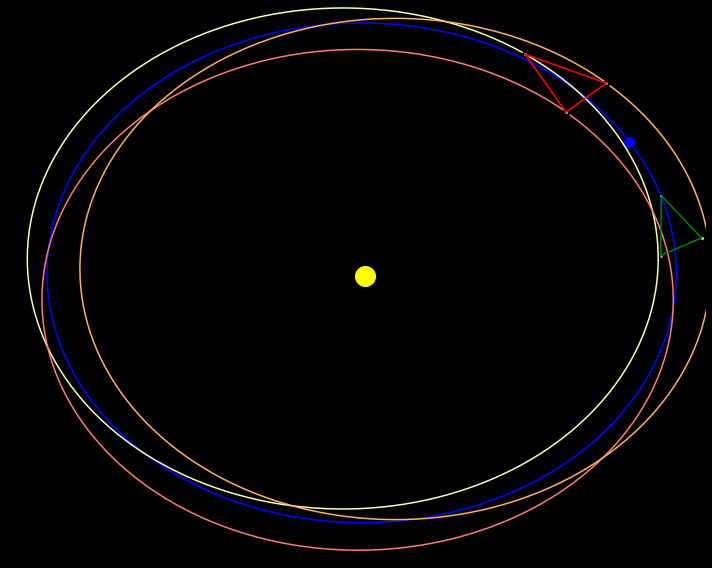

In [7]:
# #绘动图3d2#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
duration = 25 #总共的时间       figsize代表横纵比
speed = 1.0#播放速率    
number = len(orbitData)

plt.style.use('dark_background')
fig_mpl = plt.figure(figsize = (10,8))

ax = fig_mpl.add_subplot(111, projection='3d')



# 使用MOVIEPY让图动起来(根据时间t来更新图). 保存为GIF.
def make_frame_mpl(t):
    tNorm = t/duration      #0 --> 1
    index = int(number*(t/duration))  #0 --> number
    
    ax.clear()
    ax.view_init(90, 60)
    ax.set_zlabel('Z') #坐标轴
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    ax.set_xlim(-0.6,0.6)#设置刻度
    ax.set_ylim(-0.6,0.6)
    ax.set_zlim(-0.6,0.6)
    ax.set_axis_off()
    #sun
    ax.plot(sunPX[index:(index + 1)], sunPY[index:(index + 1)], sunPZ[index:(index + 1)],'o',ms=20, c ='yellow')
    ax.plot(sunPX[0:index], sunPY[0:index], sunPZ[0:index], ms=0.2, c ='yellow')
    
    #earth
    ax.plot(earthPX[index:(index + 1)], earthPY[index:(index + 1)], earthPZ[index:(index + 1)],'o',ms=10, c ='blue')
    ax.plot(earthPX[0:index], earthPY[0:index],earthPZ[0:index], ms=0.2, c ='blue')
    
    ####TAIJI####
    #scp1
    ax.plot(scp1Xs[index:(index + 1)], scp1Ys[index:(index + 1)], scp1Zs[index:(index + 1)],'o',ms=2)
    ax.plot(scp1Xs[0:index], scp1Ys[0:index], scp1Zs[0:index], ms=0.1)
    
    #scp2
    ax.plot(scp2Xs[index:(index + 1)], scp2Ys[index:(index + 1)], scp2Zs[index:(index + 1)],'o',ms=2)
    ax.plot(scp2Xs[0:index], scp2Ys[0:index], scp2Zs[0:index], ms=0.1)

    #scp3
    ax.plot(scp3Xs[index:(index + 1)], scp3Ys[index:(index + 1)], scp3Zs[index:(index + 1)],'o',ms=2)
    ax.plot(scp3Xs[0:index], scp3Ys[0:index], scp3Zs[0:index], ms=0.1)    

    
    #三角形形状
    ax.plot([scp1Xs[index], scp2Xs[index]], \
           [scp1Ys[index], scp2Ys[index]], \
            [scp1Zs[index], scp2Zs[index]], ms=2, c = 'red')

    ax.plot([scp3Xs[index], scp2Xs[index]], \
           [scp3Ys[index], scp2Ys[index]], \
            [scp3Zs[index], scp2Zs[index]], ms=2, c = 'red')

    ax.plot([scp1Xs[index], scp3Xs[index]], \
           [scp1Ys[index], scp3Ys[index]], \
            [scp1Zs[index], scp3Zs[index]], ms=2, c = 'red')
    
    ####LISA####
    #scp1
    ax.plot(scp1Xs2[index:(index + 1)], scp1Ys2[index:(index + 1)], scp1Zs2[index:(index + 1)],'o',ms=2)
#     ax.plot(scp1Xs2[0:index], scp1Ys2[0:index], scp1Zs2[0:index], ms=0.1)
    
    #scp2
    ax.plot(scp2Xs2[index:(index + 1)], scp2Ys2[index:(index + 1)], scp2Zs2[index:(index + 1)],'o',ms=2)
#     ax.plot(scp2Xs2[0:index], scp2Ys2[0:index], scp2Zs2[0:index], ms=0.1)

    #scp3
    ax.plot(scp3Xs2[index:(index + 1)], scp3Ys2[index:(index + 1)], scp3Zs2[index:(index + 1)],'o',ms=2)
#     ax.plot(scp3Xs2[0:index], scp3Ys2[0:index], scp3Zs2[0:index], ms=0.1)    

    
    #三角形形状
    ax.plot([scp1Xs2[index], scp2Xs2[index]], \
           [scp1Ys2[index], scp2Ys2[index]], \
            [scp1Zs2[index], scp2Zs2[index]], ms=2, c = 'green')

    ax.plot([scp3Xs2[index], scp2Xs2[index]], \
           [scp3Ys2[index], scp2Ys2[index]], \
            [scp3Zs2[index], scp2Zs2[index]], ms=2, c = 'green')

    ax.plot([scp1Xs2[index], scp3Xs2[index]], \
           [scp1Ys2[index], scp3Ys2[index]], \
            [scp1Zs2[index], scp3Zs2[index]],  ms=2, c = 'green')      

    plt.tight_layout()
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation =mpy.VideoClip(make_frame_mpl, duration=duration)
# animation.speedx(speed).write_videofile("taiji_orbit.mp4", fps=30) #输出mp4, speedx表示播放速度(1.0为正常速度), fps每秒帧数
#animation.speedx(speed).write_gif("TAIJI&LISA.gif", fps=30) #输出mp4, speedx表示播放速度(1.0为正常速度), fps每秒帧数
animation.speedx(speed).ipython_display(fps=30, loop=1, autoplay=0)

t:   1%|          | 5/750 [00:00<00:15, 49.46it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


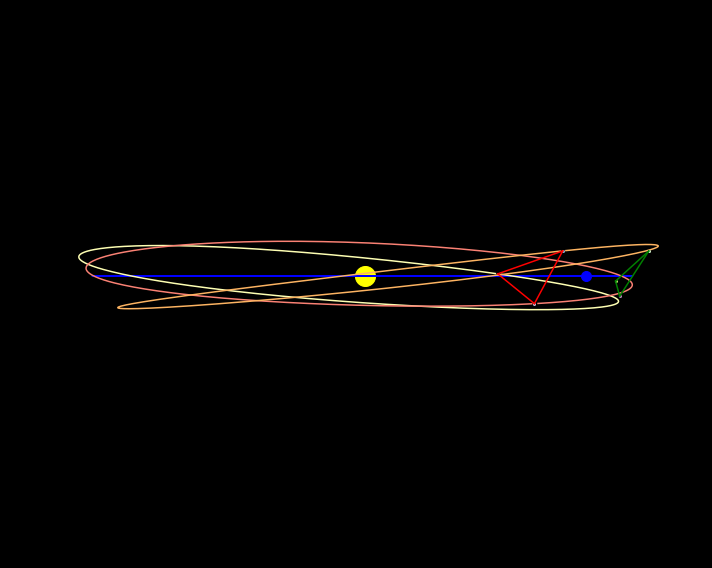

In [8]:
# #绘动图3d2#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
duration = 25 #总共的时间       figsize代表横纵比
speed = 1.0#播放速率    
number = len(orbitData)

plt.style.use('dark_background')
fig_mpl = plt.figure(figsize = (10,8))

ax = fig_mpl.add_subplot(111, projection='3d')



# 使用MOVIEPY让图动起来(根据时间t来更新图). 保存为GIF.
def make_frame_mpl(t):
    tNorm = t/duration      #0 --> 1
    index = int(number*(t/duration))  #0 --> number
    
    ax.clear()
    ax.view_init(0, 60)
    ax.set_zlabel('Z') #坐标轴
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    ax.set_xlim(-0.7,0.7)#设置刻度
    ax.set_ylim(-0.7,0.7)
    ax.set_zlim(-0.7,0.7)
    ax.set_axis_off()
    #sun
    ax.plot(sunPX[index:(index + 1)], sunPY[index:(index + 1)], sunPZ[index:(index + 1)],'o',ms=20, c ='yellow')
    ax.plot(sunPX[0:index], sunPY[0:index], sunPZ[0:index], ms=0.2, c ='yellow')
    
    #earth
    ax.plot(earthPX[index:(index + 1)], earthPY[index:(index + 1)], earthPZ[index:(index + 1)],'o',ms=10, c ='blue')
    ax.plot(earthPX[0:index], earthPY[0:index],earthPZ[0:index], ms=0.2, c ='blue')
    
    ####TAIJI####
    #scp1
    ax.plot(scp1Xs[index:(index + 1)], scp1Ys[index:(index + 1)], scp1Zs[index:(index + 1)],'o',ms=2)
    ax.plot(scp1Xs[0:index], scp1Ys[0:index], scp1Zs[0:index], ms=0.1)
    
    #scp2
    ax.plot(scp2Xs[index:(index + 1)], scp2Ys[index:(index + 1)], scp2Zs[index:(index + 1)],'o',ms=2)
    ax.plot(scp2Xs[0:index], scp2Ys[0:index], scp2Zs[0:index], ms=0.1)

    #scp3
    ax.plot(scp3Xs[index:(index + 1)], scp3Ys[index:(index + 1)], scp3Zs[index:(index + 1)],'o',ms=2)
    ax.plot(scp3Xs[0:index], scp3Ys[0:index], scp3Zs[0:index], ms=0.1)    

    
    #三角形形状
    ax.plot([scp1Xs[index], scp2Xs[index]], \
           [scp1Ys[index], scp2Ys[index]], \
            [scp1Zs[index], scp2Zs[index]], ms=2, c = 'red')

    ax.plot([scp3Xs[index], scp2Xs[index]], \
           [scp3Ys[index], scp2Ys[index]], \
            [scp3Zs[index], scp2Zs[index]], ms=2, c = 'red')

    ax.plot([scp1Xs[index], scp3Xs[index]], \
           [scp1Ys[index], scp3Ys[index]], \
            [scp1Zs[index], scp3Zs[index]], ms=2, c = 'red')
    
    ####LISA####
    #scp1
    ax.plot(scp1Xs2[index:(index + 1)], scp1Ys2[index:(index + 1)], scp1Zs2[index:(index + 1)],'o',ms=2)
#     ax.plot(scp1Xs2[0:index], scp1Ys2[0:index], scp1Zs2[0:index], ms=0.1)
    
    #scp2
    ax.plot(scp2Xs2[index:(index + 1)], scp2Ys2[index:(index + 1)], scp2Zs2[index:(index + 1)],'o',ms=2)
#     ax.plot(scp2Xs2[0:index], scp2Ys2[0:index], scp2Zs2[0:index], ms=0.1)

    #scp3
    ax.plot(scp3Xs2[index:(index + 1)], scp3Ys2[index:(index + 1)], scp3Zs2[index:(index + 1)],'o',ms=2)
#     ax.plot(scp3Xs2[0:index], scp3Ys2[0:index], scp3Zs2[0:index], ms=0.1)    

    
    #三角形形状
    ax.plot([scp1Xs2[index], scp2Xs2[index]], \
           [scp1Ys2[index], scp2Ys2[index]], \
            [scp1Zs2[index], scp2Zs2[index]], ms=2, c = 'green')

    ax.plot([scp3Xs2[index], scp2Xs2[index]], \
           [scp3Ys2[index], scp2Ys2[index]], \
            [scp3Zs2[index], scp2Zs2[index]], ms=2, c = 'green')

    ax.plot([scp1Xs2[index], scp3Xs2[index]], \
           [scp1Ys2[index], scp3Ys2[index]], \
            [scp1Zs2[index], scp3Zs2[index]],  ms=2, c = 'green')      

    plt.tight_layout()
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation =mpy.VideoClip(make_frame_mpl, duration=duration)
# animation.speedx(speed).write_videofile("taiji_orbit.mp4", fps=30) #输出mp4, speedx表示播放速度(1.0为正常速度), fps每秒帧数
#animation.speedx(speed).write_gif("TAIJI&LISA.gif", fps=30) #输出mp4, speedx表示播放速度(1.0为正常速度), fps每秒帧数
animation.speedx(speed).ipython_display(fps=30, loop=1, autoplay=0)

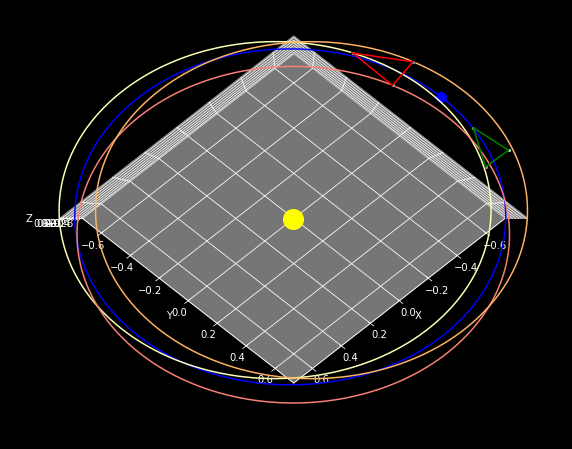

In [9]:
fig_mpl = plt.figure(figsize = (10,8))

ax = fig_mpl.add_subplot(111, projection='3d')
index = len(sunPX) -1

ax.view_init(90, 45)
ax.set_zlabel('Z') #坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_xlim(-0.7,0.7)#设置刻度
ax.set_ylim(-0.7,0.7)
ax.set_zlim(-0.7,0.7)
# ax.set_axis_off()
#sun
ax.plot(sunPX[index:(index + 1)], sunPY[index:(index + 1)], sunPZ[index:(index + 1)],'o',ms=20, c ='yellow')
ax.plot(sunPX[0:index], sunPY[0:index], sunPZ[0:index], ms=0.2, c ='yellow')

#earth
ax.plot(earthPX[index:(index + 1)], earthPY[index:(index + 1)], earthPZ[index:(index + 1)],'o',ms=10, c ='blue')
ax.plot(earthPX[0:index], earthPY[0:index],earthPZ[0:index], ms=0.2, c ='blue')

####TAIJI####
#scp1
ax.plot(scp1Xs[index:(index + 1)], scp1Ys[index:(index + 1)], scp1Zs[index:(index + 1)],'o',ms=2)
ax.plot(scp1Xs[0:index], scp1Ys[0:index], scp1Zs[0:index], ms=0.1)

#scp2
ax.plot(scp2Xs[index:(index + 1)], scp2Ys[index:(index + 1)], scp2Zs[index:(index + 1)],'o',ms=2)
ax.plot(scp2Xs[0:index], scp2Ys[0:index], scp2Zs[0:index], ms=0.1)

#scp3
ax.plot(scp3Xs[index:(index + 1)], scp3Ys[index:(index + 1)], scp3Zs[index:(index + 1)],'o',ms=2)
ax.plot(scp3Xs[0:index], scp3Ys[0:index], scp3Zs[0:index], ms=0.1)    


#三角形形状
ax.plot([scp1Xs[index], scp2Xs[index]], \
       [scp1Ys[index], scp2Ys[index]], \
        [scp1Zs[index], scp2Zs[index]], ms=2, c = 'red')

ax.plot([scp3Xs[index], scp2Xs[index]], \
       [scp3Ys[index], scp2Ys[index]], \
        [scp3Zs[index], scp2Zs[index]], ms=2, c = 'red')

ax.plot([scp1Xs[index], scp3Xs[index]], \
       [scp1Ys[index], scp3Ys[index]], \
        [scp1Zs[index], scp3Zs[index]], ms=2, c = 'red')

####LISA####
#scp1
ax.plot(scp1Xs2[index:(index + 1)], scp1Ys2[index:(index + 1)], scp1Zs2[index:(index + 1)],'o',ms=2)
#     ax.plot(scp1Xs2[0:index], scp1Ys2[0:index], scp1Zs2[0:index], ms=0.1)

#scp2
ax.plot(scp2Xs2[index:(index + 1)], scp2Ys2[index:(index + 1)], scp2Zs2[index:(index + 1)],'o',ms=2)
#     ax.plot(scp2Xs2[0:index], scp2Ys2[0:index], scp2Zs2[0:index], ms=0.1)

#scp3
ax.plot(scp3Xs2[index:(index + 1)], scp3Ys2[index:(index + 1)], scp3Zs2[index:(index + 1)],'o',ms=2)
#     ax.plot(scp3Xs2[0:index], scp3Ys2[0:index], scp3Zs2[0:index], ms=0.1)    


#三角形形状
ax.plot([scp1Xs2[index], scp2Xs2[index]], \
       [scp1Ys2[index], scp2Ys2[index]], \
        [scp1Zs2[index], scp2Zs2[index]], ms=2, c = 'green')

ax.plot([scp3Xs2[index], scp2Xs2[index]], \
       [scp3Ys2[index], scp2Ys2[index]], \
        [scp3Zs2[index], scp2Zs2[index]], ms=2, c = 'green')

ax.plot([scp1Xs2[index], scp3Xs2[index]], \
       [scp1Ys2[index], scp3Ys2[index]], \
        [scp1Zs2[index], scp3Zs2[index]],  ms=2, c = 'green')     
plt.show()